**Выполнил:** Максим Еремеев (БКЛ-221)

https://github.com/dashapopova/CompSem2024/blob/main/HW/HW1.md

# **синсет search.v.01**

**Шаг 1**

В базе WordNet возьмите синсет 'search.v.01'. Из всех языков, которые есть в базе, извлеките списки лемм, относящихся к этому синсету.

In [213]:
import nltk
# имортим ворднет (без download дальше ругается)
nltk.download('wordnet')
# имортим мультиязычный ворднет, чтобы работать сразу со всеми языками
nltk.download('omw-1.4')

# сократим до wn
from nltk.corpus import wordnet as wn
import pprint

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [214]:
# инициализируем синсет для любого иностранного слова, чтобы добавить языки
# (без этого в списке языков будет только eng)
wn.synsets("perro", lang='spa')

[Synset('dog.n.01'), Synset('rotter.n.01')]

In [215]:
# создаём список со всеми поддерживаемыми языками
lang_list = sorted(wn.langs())
# посмотрим на часть языков, с которыми будем работать
lang_list[:10]

['als', 'arb', 'bul', 'cat', 'cmn', 'dan', 'ell', 'eng', 'eus', 'fin']

In [216]:
def synset_to_lemmas(synset):
  # создаём словарь, где в ключах будут языки, а в значениях — леммы,
  # соответствующие нашему синсету в данном языке
  lang_lemmas_dict = {}

  for language in lang_list:
    # убираем пустые вхождения через if (языки, где у синсента нет лемм)
    if wn.synset(synset).lemmas(language):
    # записываем в словарь язык и список лемм для синсета в этом языке
      lang_lemmas_dict[language] = wn.synset(synset).lemmas(language)

  return lang_lemmas_dict

In [217]:
lang_lemmas_dict = synset_to_lemmas('search.v.01')
lang_lemmas_dict

{'als': [Lemma('search.v.01.gjurmim'),
  Lemma('search.v.01.kërkim'),
  Lemma('search.v.01.kërkoj')],
 'arb': [Lemma('search.v.01.استشار'),
  Lemma('search.v.01.استكشف'),
  Lemma('search.v.01.اكتشف'),
  Lemma('search.v.01.بحث'),
  Lemma('search.v.01.بحث_في'),
  Lemma('search.v.01.تقصى'),
  Lemma('search.v.01.حاول'),
  Lemma('search.v.01.حاول_إيجاد'),
  Lemma('search.v.01.سبر'),
  Lemma('search.v.01.سعى_لعمل_شئ'),
  Lemma('search.v.01.طلب'),
  Lemma('search.v.01.طمح_في'),
  Lemma('search.v.01.فتش'),
  Lemma('search.v.01.فحص'),
  Lemma('search.v.01.قصد')],
 'bul': [Lemma('search.v.01.търся')],
 'cat': [Lemma('search.v.01.buscar'),
  Lemma('search.v.01.cercar'),
  Lemma('search.v.01.escorcollar')],
 'cmn': [Lemma('search.v.01.寻找'),
  Lemma('search.v.01.寻觅'),
  Lemma('search.v.01.找'),
  Lemma('search.v.01.找寻'),
  Lemma('search.v.01.搜寻'),
  Lemma('search.v.01.搜查'),
  Lemma('search.v.01.搜索')],
 'dan': [Lemma('search.v.01.lede'), Lemma('search.v.01.søge')],
 'ell': [Lemma('search.v.01.ψάχνω')

**Шаг 2**

Теперь, наоборот, для каждой леммы из каждого языка составьте список синсетов, к которым она относится. Из этих синсетов выберите такие, к которым относится больше 3 лемм из нашего изначального списка (надеемся, что это поможет нам выделить более устойчивые и надежные связи). Оставшиеся синсеты и станут узлами нашего графа.

In [218]:
import re

def lemmas_to_synsets(lang_lemmas_dict):
  # при поиске синсетов важно учитывать языки, потому что в разных языках есть омонимичные леммы
  # создаём словарь, в ключах — язык, в значениях словарь вида лемма : синсеты
  lang_lemmas_syns_dict = {}

  # добавляем счётчик, чтобы считать количество синсетов
  counter = {}

  # проходимся по словарю с языками и леммами
  for language, lemmas in lang_lemmas_dict.items():

    # создаём пустой словарь
    inlang_dict = {}

    # для каждой леммы из списка лемм
    for lemma in lemmas:
      # достаём слово регулярным выражением
      word = re.search(r"\('(.*)\.(.*?)'\)", str(lemma)).group(2)
      # находим синсеты для этого слова в заданном языке
      syns = wn.synsets(word, lang=language)
      # добавляем в словарь слово и соответсвующие ему синсеты
      inlang_dict[word] = syns

      for syn in syns: # для каждого синсента
        # очищаем регулярными выражениями
        clean_syn = re.match(r"Synset\('(.*?)'\)", str(syn))[1]
        # если он уже есть в счётчике, прибавляем к его значению 1
        if clean_syn in counter:
          counter[clean_syn] += 1
        # если ещё нет, то создаём, записывая в значение 1
        else:
          counter[clean_syn] = 1

    # добавляем в большой словарь пару язык : словарь с леммами и синсетами
    lang_lemmas_syns_dict[language] = inlang_dict

  return lang_lemmas_syns_dict, counter

In [219]:
# посмотрим на данные в получившемся словаре
pprint.pp(dict(list(lemmas_to_synsets(lang_lemmas_dict)[0].items())[5:7]))

{'dan': {'lede': [Synset('search.v.01'),
                  Synset('generate.v.01'),
                  Synset('search.v.02'),
                  Synset('head.v.02')],
         'søge': [Synset('search.v.01'), Synset('search.v.02')]},
 'ell': {'ψάχνω': [Synset('dredge.v.02'),
                   Synset('search.v.01'),
                   Synset('quest.v.02'),
                   Synset('search.v.02')]}}


In [220]:
# в новом счётчике оставляем только те синсеты, которые встретили >3 раз
def get_synsets(counter):
  new_counter = {}

  for key, value in counter.items():
    if value > 3:
      new_counter[key] = value

  return new_counter

In [221]:
new_counter = get_synsets(lemmas_to_synsets(lang_lemmas_dict)[1])
new_counter

{'search.n.05': 5,
 'search.v.01': 105,
 'search.n.02': 8,
 'dredge.v.02': 7,
 'search.v.04': 33,
 'investigate.v.02': 7,
 'search.n.01': 5,
 'comb.v.02': 9,
 'invite.v.01': 5,
 'learn.v.04': 5,
 'determine.v.01': 4,
 'determine.v.08': 4,
 'analyze.v.01': 6,
 'probe.v.01': 8,
 'investigate.v.01': 7,
 'examine.v.02': 5,
 'size_up.v.01': 7,
 'try.v.01': 13,
 'test.v.01': 4,
 'inspect.v.01': 9,
 'search.v.02': 52,
 'research.v.02': 26,
 'seek.v.01': 19,
 'scan.v.02': 4,
 'quest.v.02': 5,
 'quest.v.01': 6,
 'scout.v.01': 4,
 'seek.v.04': 5,
 'seek.v.05': 7,
 'anticipate.v.05': 5,
 'examine.v.04': 4,
 'probe.v.02': 4,
 'cast_about.v.01': 5,
 'quest_for.v.01': 5,
 'find.v.05': 4,
 'sought.a.01': 4,
 'frolic.v.01': 5,
 'frisk.v.02': 4,
 'grope.v.01': 7,
 'grope.v.02': 6,
 'want.v.03': 6}

In [222]:
# ищем новые леммы для каждого из синсетов
def top_synsents_to_lemmas(new_counter):
  new_syns_lemmas_dict = {}

  for syn in new_counter: # проходимся по синсетам, встретившимся >3 раз
    # создаём список для кортежей вида (лемма, язык)
    # из-за омонимии лемм в разных языках
    lemmas_lang = []

    for language in lang_list: # проходимся по языкам в списке
    # убираем пустые вхождения через if
      if wn.synset(syn).lemmas(language):
        # получаем список лемм для конкретного синсета и языка
        lemmas_list = wn.synset(syn).lemmas(language)

        for lemma in lemmas_list: # каждую леммц в этом списке
          # очищаем от мусора регулярным выражением (это необязательно)
          clean_lemma = re.match(r"Lemma\('(.*)\.(.*?)'\)", str(lemma))[2]
          # добавляем в виде кортежа (лемма, язык) в новый список
          lemmas_lang.append((clean_lemma, language))

    # после завершения цикла прохода по языкам добавляем список в словарь
    new_syns_lemmas_dict[syn] = lemmas_lang
  return new_syns_lemmas_dict

In [223]:
# посмотрим на кусок словаря
new_syns_lemmas_dict = top_synsents_to_lemmas(new_counter)
pprint.pp(dict(list(new_syns_lemmas_dict.items())[5:7]))

{'investigate.v.02': [('hetoj', 'als'),
                      ('investigoj', 'als'),
                      ('kërkoj', 'als'),
                      ('ألقى_سؤالا', 'arb'),
                      ('استجوب', 'arb'),
                      ('استعلم', 'arb'),
                      ('استفسر', 'arb'),
                      ('استقصى', 'arb'),
                      ('اِسْتعْلم', 'arb'),
                      ('اِسْتفْسر', 'arb'),
                      ('بحث', 'arb'),
                      ('تدارس', 'arb'),
                      ('حقق', 'arb'),
                      ('حقق_في_الشرطة', 'arb'),
                      ('سأل', 'arb'),
                      ('فتش', 'arb'),
                      ('فحص', 'arb'),
                      ('قام_بتحقيق', 'arb'),
                      ('investigar', 'cat'),
                      ('打听', 'cmn'),
                      ('探询', 'cmn'),
                      ('查明', 'cmn'),
                      ('询问', 'cmn'),
                      ('调查', 'cmn'),
                      ('

**Шаг 3**

Теперь строим ребра. Ребро между двумя синсетами ставьте в том случае, если хотя бы в одном языке есть хотя бы одна лемма, которая относится к ним обоим. Пусть граф будет взвешенным: вес ребра будет отражать количество лемм, относящихся к обоим узлам пары.

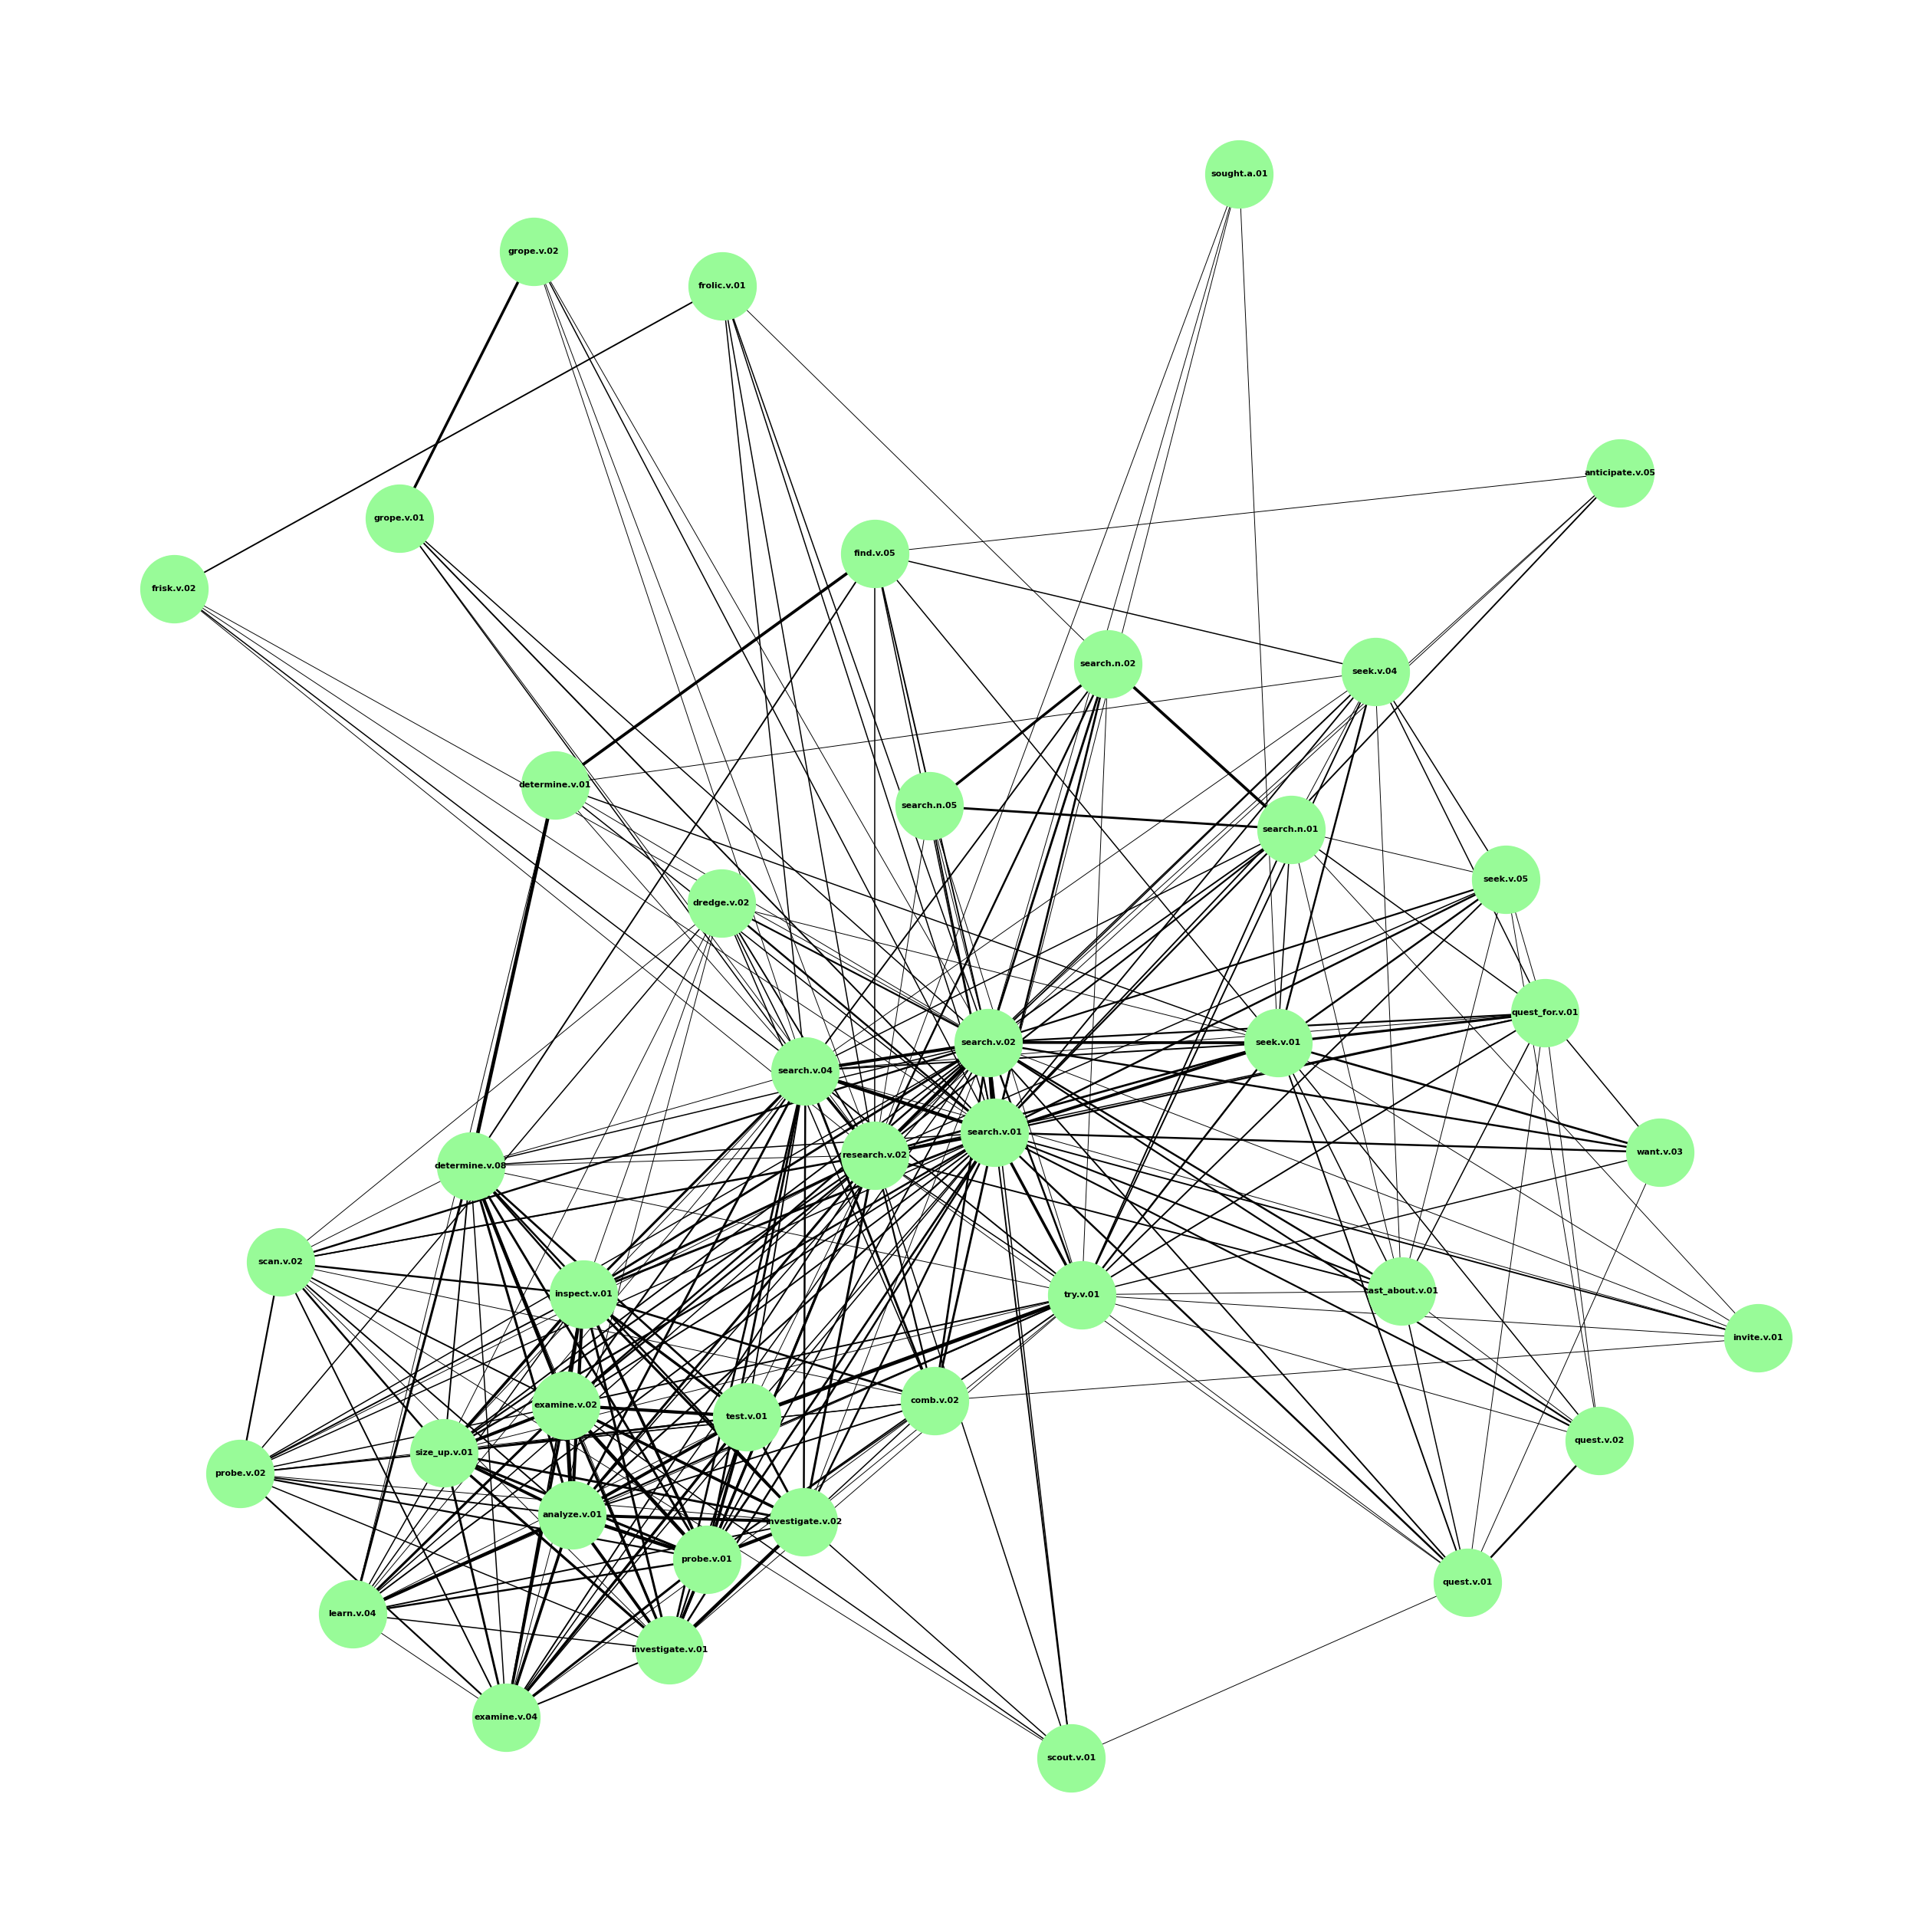

In [224]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import math

# создаём пустой граф
G = nx.Graph()

# добавляем синсеты как узлы
for synset in new_syns_lemmas_dict:
    G.add_node(synset)

# функция для поиска общих лемм между двумя синсетами
def common_lemmas(synset1_lemmas, synset2_lemmas):
    lemmas1 = {lemma for lemma, _ in synset1_lemmas}
    lemmas2 = {lemma for lemma, _ in synset2_lemmas}
    return lemmas1 & lemmas2  # возвращаем пересечение лемм

# добавляем рёбра между синсетами с весом, равным количеству общих лемм
lw = [] # cписок с данными для толщины рёбер
for synset1, synset2 in combinations(new_syns_lemmas_dict.keys(), 2):
    common = common_lemmas(new_syns_lemmas_dict[synset1], new_syns_lemmas_dict[synset2])
    if common:  # если есть общие леммы
        G.add_edge(synset1, synset2, weight=len(common))
        lw.append(math.log(len(common)))

# отображаем рёбра с их весами
# for (u, v, wt) in G.edges(data=True):
#     print(f"Ребро между {u} и {v}, вес: {wt['weight']}")

# отобразим граф
# добавляем способ укладки
pos = nx.spring_layout(G)

plt.figure(figsize=(25, 25))
nx.draw(G, pos, with_labels=True, node_size=4000, node_color="palegreen", font_size=8, font_weight="bold", width=lw)

# подписи
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

**Шаг 4 (3 балла)**

Проанализируйте получившийся граф. Сколько получилось связных компонент? Какая у этого графа плотность? Как распределились (взвешенные) степени узлов? Какие узлы оказались центральными (попробуйте несколько метрик, например, degree centrality и eigencentrality, прокомментируйте результат)? Разбейте граф на сообщества (поиграйте с несколькими алгоритмами) и прокомментируйте результаты.

Критерии: 0.5 - связные компоненты, 0.5 - плотность графа, 1 - степени и центральность узлов, 1 - сообщества

In [225]:
from networkx.algorithms import community
from collections import Counter

# выводим информацию о графе
def graph_info(G):
  print(f"Число узлов: {G.number_of_nodes()}")
  print(f"Число рёбер: {G.number_of_edges()}")

  # связные компоненты
  components = nx.components.connected_components(G)
  nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
  print(f"Число связных узлов: {len(nodes)}")

  # плотность графа: отношение числа имеющихся рёбер графа к максимально возможному количеству рёбер
  print(f"Плотность графа: {nx.density(G)}")

  # распределение взвешенных степеней узлов
  # взвешенная степень (weighted degree) – это количество связей узла, разделенное на общее количество связей в графе
  degrees = [val for (node, val) in G.degree()] # находим список связей узлов
  weighted_degrees = [degree / sum(degrees) for degree in degrees]
  print(f"Взвешенные степени узлов: {weighted_degrees}")

  # сделаем гистограмму, показывающую распределение
  plt.hist(weighted_degrees)

# центральные узлы
def graph_centre(G):
  print("Топ-10 по метрике degree_centrality")
  deg = nx.degree_centrality(G)
  print(sorted(deg, key=deg.get, reverse=True)[0:10])

  print("Топ-10 по метрике betweenness_centrality")
  b = nx.betweenness_centrality(G)
  print(sorted(b, key=b.get, reverse=True)[0:10])

  print("Топ-10 по метрике closeness_centrality")
  c = nx.closeness_centrality(G)
  print(sorted(c, key=c.get, reverse=True)[0:10])

  print("Топ-10 по метрике eigenvector_centrality")
  e = nx.eigenvector_centrality(G)
  print(sorted(e, key=e.get, reverse=True)[0:10])

# сообщества
def graph_communities(G):
  # убирает постепенно по ребру с наиболее высокой betweenness centrality
  communities_generator = community.girvan_newman(G)
  top_level_communities = next(communities_generator)
  next_level_communities = next(communities_generator)

  print("По алгоритму Гирван — Ньюмена")
  print("Сообщества после первого разделения:")
  for x in sorted(map(sorted, top_level_communities)):
    print(x)

  print("Сообщества после второго разделения:")
  for x in sorted(map(sorted, next_level_communities)):
    print(x)

  # данный алгоритм использует модулярность, которая в свою очередь опирается на плотность связей внутри группы
  communities_generator_2 = community.greedy_modularity_communities(G)
  print("По алгоритму Clauser — Newman — Moore")
  for frozen_set in communities_generator_2:
    print(frozen_set)

  print("По методу Лувена")
  communities_generator_3 = community.louvain_communities(G)
  for frozen_set in communities_generator_3:
    print(frozen_set)

Число узлов: 41
Число рёбер: 431
Число связных узлов: 41
Плотность графа: 0.525609756097561
Взвешенные степени узлов: [0.031322505800464036, 0.04640371229698376, 0.02320185614849188, 0.025522041763341066, 0.042923433874709975, 0.031322505800464036, 0.025522041763341066, 0.025522041763341066, 0.016241299303944315, 0.019721577726218097, 0.01740139211136891, 0.024361948955916472, 0.02320185614849188, 0.02668213457076566, 0.02668213457076566, 0.027842227378190254, 0.024361948955916472, 0.037122969837587005, 0.02320185614849188, 0.025522041763341066, 0.04524361948955916, 0.04640371229698376, 0.030162412993039442, 0.022041763341067284, 0.018561484918793503, 0.016241299303944315, 0.025522041763341066, 0.024361948955916472, 0.025522041763341066, 0.015081206496519721, 0.02320185614849188, 0.02320185614849188, 0.02668213457076566, 0.022041763341067284, 0.02320185614849188, 0.01160092807424594, 0.008120649651972157, 0.010440835266821345, 0.010440835266821345, 0.010440835266821345, 0.0174013921113

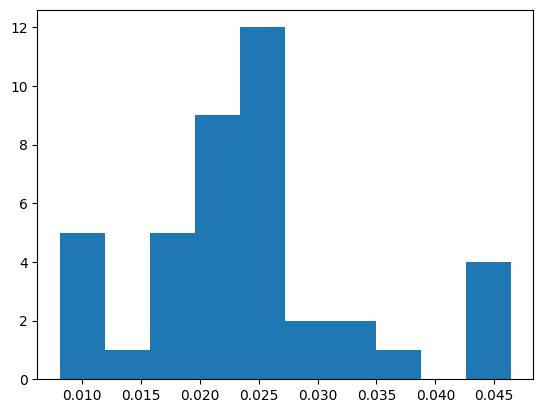

In [226]:
graph_info(G)

In [227]:
graph_centre(G)

Топ-10 по метрике degree_centrality
['search.v.01', 'research.v.02', 'search.v.02', 'search.v.04', 'try.v.01', 'search.n.05', 'investigate.v.02', 'seek.v.01', 'examine.v.02', 'probe.v.01']
Топ-10 по метрике betweenness_centrality
['search.v.01', 'research.v.02', 'search.v.02', 'search.v.04', 'try.v.01', 'search.n.05', 'investigate.v.02', 'seek.v.01', 'dredge.v.02', 'comb.v.02']
Топ-10 по метрике closeness_centrality
['search.v.01', 'research.v.02', 'search.v.02', 'search.v.04', 'try.v.01', 'search.n.05', 'investigate.v.02', 'seek.v.01', 'examine.v.02', 'probe.v.01']
Топ-10 по метрике eigenvector_centrality
['search.v.01', 'research.v.02', 'search.v.02', 'search.v.04', 'try.v.01', 'investigate.v.02', 'search.n.05', 'seek.v.01', 'examine.v.02', 'probe.v.01']


***Degree centrality*** показывает, сколько непосредственных связей имеет узел с другими узлами. В топе по этой метрике синсеты, представляющие более общие и часто встречающиеся концепции.

***Betweenness centrality*** измеряет, как часто узел оказывается на кратчайшем пути между другими узлами. Список очень похож на топ по ***degree centrality***, за исключением синсетов **dredge.v.02** и **comb.v.02** в конце, которые чаще, чем **examine.v.02** и **probe.v.01**, служат "посредниками" между кластерами в графе.

***Closeness centrality*** измеряет, насколько узел близок ко всем другим узлам в сети, то есть как быстро можно добраться от этого узла до любого другого узла графа. Топ-10 по этой метрике почти идентичен первому и второму спискам. Это свидетельствует о том, что узлы с большим количеством прямых связей (высоким ***degree centrality***) также имеют короткие пути до остальных узлов и часто являются посредниками.

***Eigenvector centrality*** измеряет не только количество связей узла, но и влиятельность узлов, с которыми он связан. Это позволяет выявить влиятельные узлы, которые связаны с другими влиятельными узлами. Список тоже почти идентичен первым трём, однако синсеты **investigate.v.02** и **search.n.05** как бы поменяны местами. Это говорит о том, что синсет **investigate.v.02** связан с меньшим количеством узлов, но эти узлы более влиятельные, чем у **search.n.05**.

Заметим, что топ-5 по всем метрикам совпадает. Синсеты вроде **search.v.01** и **research.v.02** — очень центральные и хорошо связаны с остальной сетью.

In [228]:
graph_communities(G)

По алгоритму Гирван — Ньюмена
Сообщества после первого разделения:
['analyze.v.01', 'anticipate.v.05', 'cast_about.v.01', 'comb.v.02', 'determine.v.01', 'determine.v.08', 'dredge.v.02', 'examine.v.02', 'examine.v.04', 'find.v.05', 'frisk.v.02', 'grope.v.01', 'grope.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'invite.v.01', 'learn.v.04', 'probe.v.01', 'probe.v.02', 'quest.v.01', 'quest.v.02', 'quest_for.v.01', 'research.v.02', 'scan.v.02', 'scout.v.01', 'search.n.01', 'search.n.02', 'search.n.05', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.04', 'seek.v.05', 'size_up.v.01', 'sought.a.01', 'test.v.01', 'try.v.01', 'want.v.03']
['frolic.v.01']
Сообщества после второго разделения:
['analyze.v.01', 'anticipate.v.05', 'cast_about.v.01', 'comb.v.02', 'determine.v.01', 'determine.v.08', 'dredge.v.02', 'examine.v.02', 'examine.v.04', 'find.v.05', 'grope.v.01', 'grope.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'invite.v.01', 'learn.v.0

После первой итерации алгоритма Гирван — Ньюмена от всех синсетов отклеилось сообщество из одного синсета **frolic.v.01**, после второй итерации — тоже отдельный синсет **frisk.v.02**. Оба синсента находятся в узлах на периферии графа.

Алгоритм Clauser — Newman — Moore выделяет два крупных сообщества: первое  включает множество синсетов, связанных с практическими действиями по нахождению чего-либо (**search.v.01**, **seek.v.01**, **research.v.02**, **quest.v.01** etc.), второе же включает синсеты, семантически более связанные с анализом (**analyze.v.01**, **probe.v.01**, **scan.v.02**, **investigate.v.01**, **examine.v.04** etc.).

Метод Лувена выделяет четыре сообщества. Первое, аналогично предыдущему анализу, связано с практическим поиском и исследованием чего-либо (**research.v.02**, **quest_for.v.01** etc.). Второе сообщество включает синсеты **determine.v.08**, **find.v.05** и **determine.v.01** и таким образом представляет группу действий, которых по Татевосову можно отнести к акциональному классу "вхождение в состояние" (найти, определить). Третье сообщество опять примерно соответсвует сообщему, выделенному алгоритмом Clauser — Newman — Moore: поиск, связанный с аналитическими действиями. Четвёртое сообщество включает только два узла — **grope.v.01** и **grope.v.02**. Возможно, его выделение связано с отличием поиска на ощупь от других типов поиска.

**Шаг 5 (2 балла)**

Постройте точно такой же граф, только теперь ставьте ребра только в том случае, если пару синсетов объединяет не менее 5 лемм (убираем все ребра с небольшим весом в поисках наиболее устойчивых связей). Проанализируйте этот граф по той же схеме (см. шаг 4). Что изменилось? Какой из графов кажется вам более содержательным и почему?

Критерии: 0.5 - обновленный граф, 0.5 - подсчет всех метрик заново, 1 - комментарий

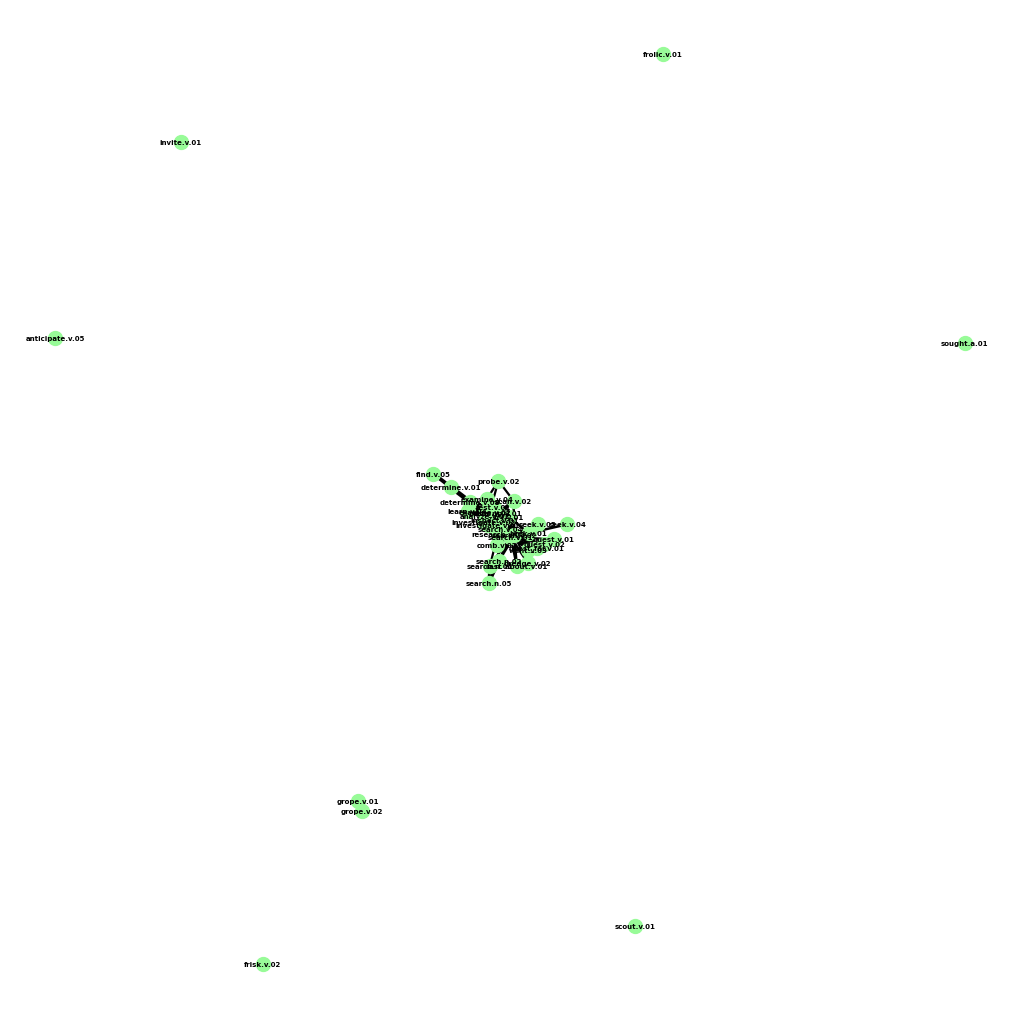

In [229]:
# создаём пустой граф
G1 = nx.Graph()

# добавляем синсеты как узлы
for synset in new_syns_lemmas_dict:
    G1.add_node(synset)

# добавляем рёбра между синсетами с весом, равным количеству общих лемм
lw = [] # cписок с данными для толщины рёбер
for synset1, synset2 in combinations(new_syns_lemmas_dict.keys(), 2):
    common = common_lemmas(new_syns_lemmas_dict[synset1], new_syns_lemmas_dict[synset2])
    if len(common) > 4:  # если есть общие леммы
        G1.add_edge(synset1, synset2, weight=len(common))
        lw.append(math.log(len(common)))

# отображаем рёбра с их весами
# for (u, v, wt) in G1.edges(data=True):
#     print(f"Ребро между {u} и {v}, вес: {wt['weight']}")

# добавляем способ укладки
pos = nx.spring_layout(G1)

plt.figure(figsize=(10, 10))
nx.draw(G1, pos, with_labels=True, node_size=100, node_color="palegreen", font_size=5, font_weight="bold", width=lw)

# подписи
# edge_labels = nx.get_edge_attributes(G1, 'weight')
# nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)

plt.show()

Число узлов: 41
Число рёбер: 119
Число связных узлов: 33
Плотность графа: 0.14512195121951219
Взвешенные степени узлов: [0.008403361344537815, 0.08823529411764706, 0.02100840336134454, 0.008403361344537815, 0.04201680672268908, 0.046218487394957986, 0.01680672268907563, 0.02100840336134454, 0.0, 0.01680672268907563, 0.008403361344537815, 0.03361344537815126, 0.058823529411764705, 0.058823529411764705, 0.04201680672268908, 0.0546218487394958, 0.046218487394957986, 0.02100840336134454, 0.04201680672268908, 0.06302521008403361, 0.06722689075630252, 0.058823529411764705, 0.03361344537815126, 0.01680672268907563, 0.012605042016806723, 0.008403361344537815, 0.0, 0.004201680672268907, 0.012605042016806723, 0.0, 0.029411764705882353, 0.012605042016806723, 0.008403361344537815, 0.012605042016806723, 0.004201680672268907, 0.0, 0.0, 0.0, 0.004201680672268907, 0.004201680672268907, 0.012605042016806723]


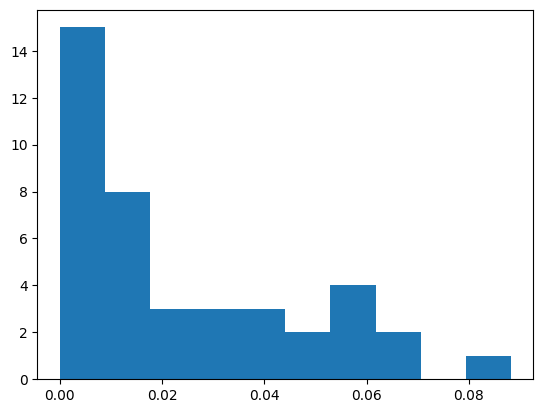

In [230]:
graph_info(G1)

Граф получился несвязным, состоит из нескольких компонент-кластеров. Куда более низкая плотность, чем у первого графа. Из-за того, что узлы разбиты по отдельным кластерам, это кажется более наглядным представлением информации о существующих сообществах.

In [231]:
graph_centre(G1)

Топ-10 по метрике degree_centrality
['search.v.01', 'search.v.02', 'inspect.v.01', 'analyze.v.01', 'probe.v.01', 'research.v.02', 'examine.v.02', 'investigate.v.02', 'size_up.v.01', 'search.v.04']
Топ-10 по метрике betweenness_centrality
['search.v.01', 'search.v.02', 'determine.v.08', 'probe.v.01', 'research.v.02', 'inspect.v.01', 'seek.v.01', 'determine.v.01', 'analyze.v.01', 'examine.v.02']
Топ-10 по метрике closeness_centrality
['search.v.01', 'search.v.02', 'inspect.v.01', 'analyze.v.01', 'probe.v.01', 'research.v.02', 'examine.v.02', 'investigate.v.02', 'size_up.v.01', 'search.v.04']
Топ-10 по метрике eigenvector_centrality
['inspect.v.01', 'analyze.v.01', 'search.v.01', 'probe.v.01', 'research.v.02', 'examine.v.02', 'investigate.v.02', 'investigate.v.01', 'size_up.v.01', 'search.v.04']


В отличие от первого графа, тут полностью совпадают топы только по метрикам ***degree_centrality*** и ***closeness_centrality***. По остальным метрикам даже в топ-5 разный набор синсетов. Например, **inspect.v.01** первый по ***eigenvector_centrality*** и всего третий по ***degree_centrality*** — это значит, что этот узел наиболее влиятельный, хотя из него и не выходит наибольшее количество рёбер.

In [232]:
graph_communities(G1)

По алгоритму Гирван — Ньюмена
Сообщества после первого разделения:
['analyze.v.01', 'cast_about.v.01', 'comb.v.02', 'determine.v.08', 'dredge.v.02', 'examine.v.02', 'examine.v.04', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'learn.v.04', 'probe.v.01', 'probe.v.02', 'quest.v.01', 'quest.v.02', 'quest_for.v.01', 'research.v.02', 'scan.v.02', 'search.n.01', 'search.n.02', 'search.n.05', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.04', 'seek.v.05', 'size_up.v.01', 'test.v.01', 'try.v.01', 'want.v.03']
['anticipate.v.05']
['determine.v.01', 'find.v.05']
['frisk.v.02']
['frolic.v.01']
['grope.v.01', 'grope.v.02']
['invite.v.01']
['scout.v.01']
['sought.a.01']
Сообщества после второго разделения:
['analyze.v.01', 'cast_about.v.01', 'comb.v.02', 'determine.v.08', 'dredge.v.02', 'examine.v.02', 'examine.v.04', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'learn.v.04', 'probe.v.01', 'probe.v.02', 'quest.v.01', 'quest.v.02', 'quest_for.v.01', 'researc

По алгоритму Гирван — Ньюмена первым от основного сообщества отрывается кластер, включающий синсеты **determine.v.01** и **find.v.05** (вхождение в состояние найденности), а затем — сообщество из одного синсета **seek.v.04**.

Алгоритм Clauser — Newman — Moore выделяет 10 сообществ: по одному на каждый маленький кластер и три в центральном.
Два сообщества, выделенные в центральном кластере, уже назывались ранее: поиск с аналитическими действиями (**analyze.v.01** etc.) и поиск с практическими действиями (**seek.v.05** etc.). Также отдельно выделяется кластер, включающий синсет **research.v.02** и три именных синсета (т.к. по условиям задания не сказано, что нужно рассматривать только глагольные синсенты, я решил их оставить).
Прочие выделенные кластеры состоят из одного или двух синсетов и изначально не были связаны рёбрами с центральной частью графа.

Метод Лувена выделяет 11 сообществ. Отличие от предыдущего алгоритма в том, что здесь выделяется отдельное сообщество для именных синсетов **search.n.0?**, а **research.v.02** отнесён к кластеру практического поиска. Также выделяется сообщество **determine.v.08**, **find.v.05**, **determine.v.01**.

**Вывод:** связь по большему количество общих лемм позволяет более чётко разграничить кластеры внутри графа. Таким образом, второй граф более информативен. При этом важно правильно установить необходимое количество общих лемм, чтобы не поделить граф на нерелевантные компоненты.

**Шаг 6 (1 балл)**

Подведите небольшой теоретический итог. Какие выводы о колексификациях в зоне глаголов поиска позволяют сделать эти два графа?

**ИТОГ:** в семантическом поле "искать" можно выделить два больших кластера: "искать, проводя аналитические действия" (e.g. **investigate.v.01**) и "искать на практике" (e.g. **quest_for.v.01**). Кроме того, также может выделяться кластер из трёх синсетов, представляющий акциональный класс **вхождение в состояние** — "найти, определить" (**determine.v.08**, **find.v.05**, **determine.v.01**), тогда как синсеты из двух названных выше кластеров относятся к **процессам**.

Вместе с этим можно выделить несколько мелких кластеров из одного-двух синсетов, среди них:
* "искать на ощупь" (**grope.v.01**, **grope.v.02**)
* "обыскивать" (**frisk.v.02**)
* "разведывать" (**scout.v.01**)

Синсеты **frolic.v.01**, **invite.v.01** и **anticipate.v.05**, выделяемые в три отдельных кластера, семантически кажутся мало связанными с поиском. Кластер "резвиться" (**frolic.v.01**), по-видимому, появился из-за соседства с синсетом **frisk.v.02**, другое значение которого — "резвиться".





**Шаг 7 (бонусный, 1 балл)**

Сравните ваши графы с подграфом LOOK FOR из базы CLICS. Что общего, в чем отличия? С чем эти отличия могут быть связаны?

Подграф из базы CLICS (по ссылке https://clics.clld.org/graphs/infomap_64_SEE)

![img](https://i.imgur.com/SfBZSSs.png)

Подграф LOOK FOR поделён на три условых кластера: "видеть, находить", "преследовать", "хотеть, желать". Только первый из них условно можно считать похожим на кластер, объединяющий "практический поиск" и кластер "найти, определить". Остальные сообщества не похожи на те, которые были выделены на графах ранее. Возможно, такое отличие связано с различиями в семантике между LOOR FOR и SEARCH (у последнего, например, нет интерпретации "хотеть или ждать чего-то")

# **синсет love.v.01**
*примечание: запускать только после прогона первого синсента*

In [233]:
# прогоняем синсет love.v.01 по нашим функциям
lang_lemmas_dict_love = synset_to_lemmas('love.v.01')
new_counter_love = get_synsets(lemmas_to_synsets(lang_lemmas_dict_love)[1])
new_syns_lemmas_dict_love = top_synsents_to_lemmas(new_counter_love)

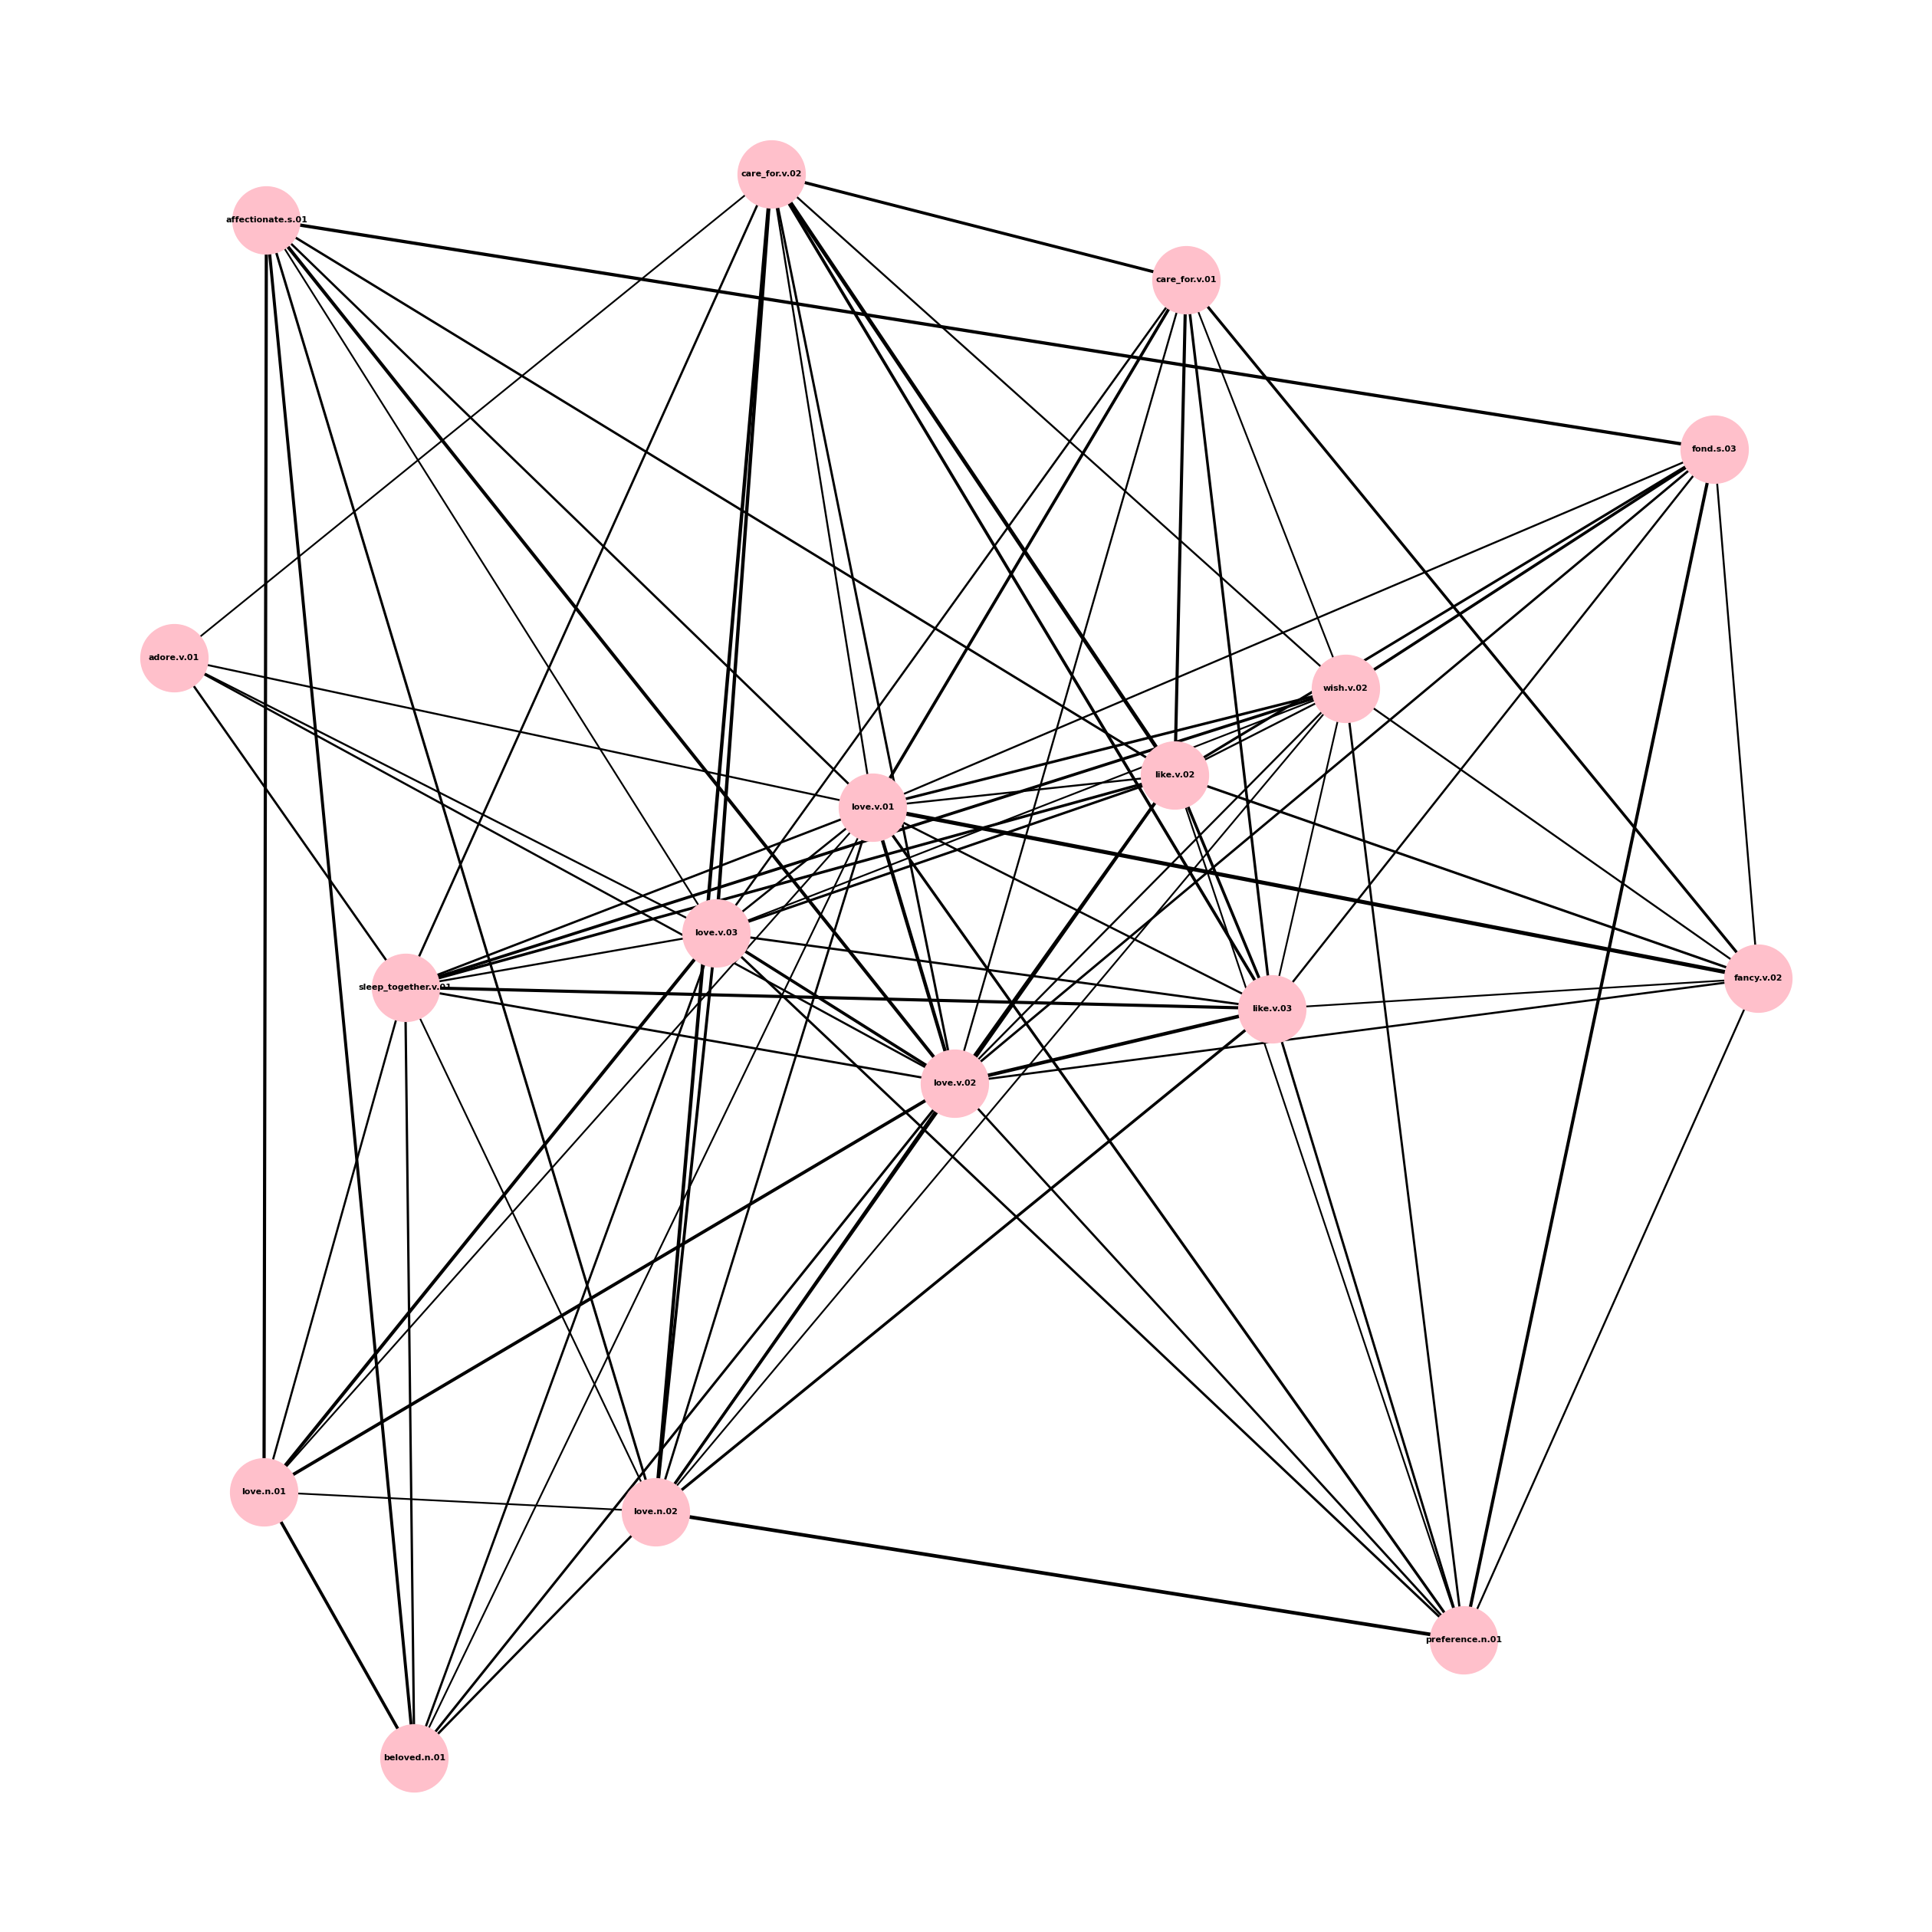

In [234]:
G_love = nx.Graph()

for synset in new_syns_lemmas_dict_love:
    G_love.add_node(synset)

def common_lemmas(synset1_lemmas, synset2_lemmas):
    lemmas1 = {lemma for lemma, _ in synset1_lemmas}
    lemmas2 = {lemma for lemma, _ in synset2_lemmas}
    return lemmas1 & lemmas2

for synset1, synset2 in combinations(new_syns_lemmas_dict_love.keys(), 2):
    common = common_lemmas(new_syns_lemmas_dict_love[synset1], new_syns_lemmas_dict_love[synset2])
    if common:
        G_love.add_edge(synset1, synset2, weight=len(common))
        lw.append(math.log(len(common)))

pos = nx.spring_layout(G_love)

plt.figure(figsize=(25, 25))
nx.draw(G_love, pos, with_labels=True, node_size=4000, node_color="pink", font_size=8, font_weight="bold", width=lw)

plt.show()

Число узлов: 17
Число рёбер: 88
Число связных узлов: 17
Плотность графа: 0.6470588235294118
Взвешенные степени узлов: [0.09090909090909091, 0.06818181818181818, 0.0625, 0.07954545454545454, 0.028409090909090908, 0.09090909090909091, 0.056818181818181816, 0.03977272727272727, 0.06818181818181818, 0.03977272727272727, 0.06818181818181818, 0.07386363636363637, 0.045454545454545456, 0.05113636363636364, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456]


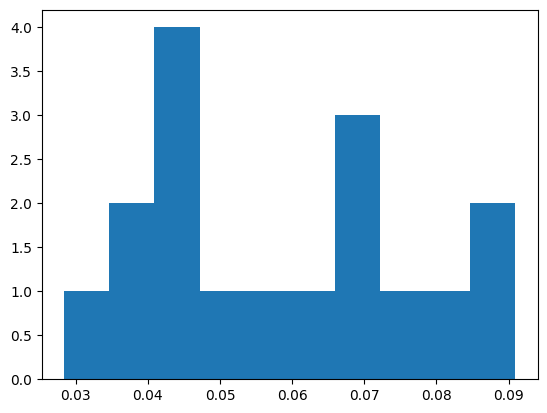

In [235]:
graph_info(G_love)

In [236]:
graph_centre(G_love)

Топ-10 по метрике degree_centrality
['love.v.01', 'love.v.02', 'love.v.03', 'like.v.02', 'wish.v.02', 'love.n.02', 'like.v.03', 'sleep_together.v.01', 'care_for.v.02', 'preference.n.01']
Топ-10 по метрике betweenness_centrality
['love.v.01', 'love.v.02', 'love.v.03', 'like.v.02', 'love.n.02', 'sleep_together.v.01', 'wish.v.02', 'like.v.03', 'care_for.v.02', 'affectionate.s.01']
Топ-10 по метрике closeness_centrality
['love.v.01', 'love.v.02', 'love.v.03', 'like.v.02', 'wish.v.02', 'love.n.02', 'like.v.03', 'sleep_together.v.01', 'care_for.v.02', 'preference.n.01']
Топ-10 по метрике eigenvector_centrality
['love.v.01', 'love.v.02', 'love.v.03', 'like.v.02', 'wish.v.02', 'like.v.03', 'love.n.02', 'sleep_together.v.01', 'care_for.v.02', 'preference.n.01']


In [237]:
graph_communities(G_love)

По алгоритму Гирван — Ньюмена
Сообщества после первого разделения:
['adore.v.01']
['affectionate.s.01', 'beloved.n.01', 'care_for.v.01', 'care_for.v.02', 'fancy.v.02', 'fond.s.03', 'like.v.02', 'like.v.03', 'love.n.01', 'love.n.02', 'love.v.01', 'love.v.02', 'love.v.03', 'preference.n.01', 'sleep_together.v.01', 'wish.v.02']
Сообщества после второго разделения:
['adore.v.01']
['affectionate.s.01', 'beloved.n.01', 'care_for.v.01', 'care_for.v.02', 'fancy.v.02', 'fond.s.03', 'like.v.02', 'like.v.03', 'love.n.02', 'love.v.01', 'love.v.02', 'love.v.03', 'preference.n.01', 'sleep_together.v.01', 'wish.v.02']
['love.n.01']
По алгоритму Clauser — Newman — Moore
frozenset({'love.v.03', 'care_for.v.02', 'love.v.01', 'affectionate.s.01', 'love.n.02', 'sleep_together.v.01', 'beloved.n.01', 'adore.v.01', 'love.n.01'})
frozenset({'like.v.03', 'preference.n.01', 'fond.s.03', 'wish.v.02', 'love.v.02', 'fancy.v.02', 'care_for.v.01', 'like.v.02'})
По методу Лувена
{'love.v.03', 'care_for.v.02', 'love.v

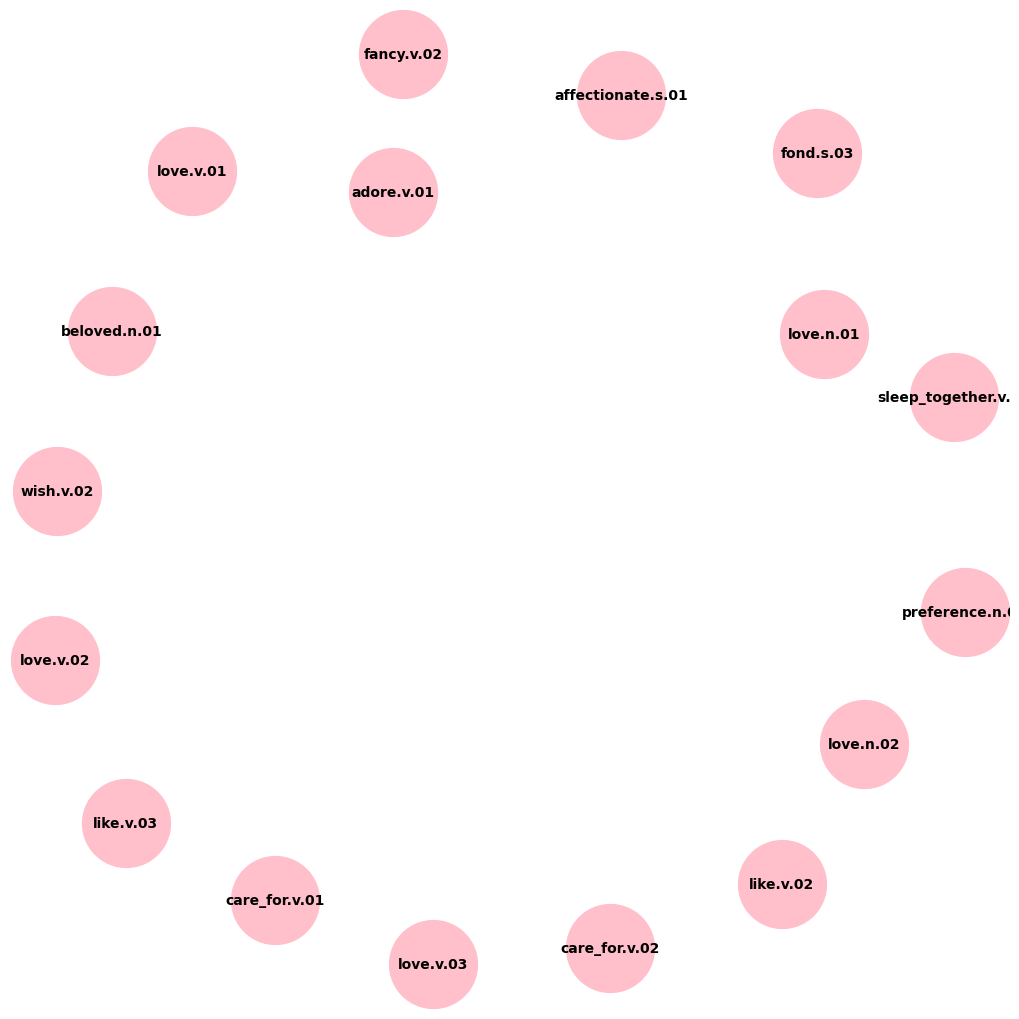

In [238]:
G1_love = nx.Graph()

for synset in new_syns_lemmas_dict_love:
    G1_love.add_node(synset)

lw = []
for synset1, synset2 in combinations(new_syns_lemmas_dict.keys(), 2):
    common = common_lemmas(new_syns_lemmas_dict[synset1], new_syns_lemmas_dict[synset2])
    if len(common) > 4:
        G1.add_edge(synset1, synset2, weight=len(common))
        lw.append(math.log(len(common)))

pos = nx.spring_layout(G1_love)

plt.figure(figsize=(10, 10))
nx.draw(G1_love, pos, with_labels=True, node_size=4000, node_color="pink", font_size=10, font_weight="bold", width=lw)

plt.show()

При ограничении >4 лемм между узлами не остаётся ни одного ребра — все узлы составляют одиночные кластеры. Таким образом, это пример плохо заданного порогового значения